In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

## First Dataset Blobs(r_s = 22)

In [4]:
X, y = make_blobs(n_samples=300, random_state=22)

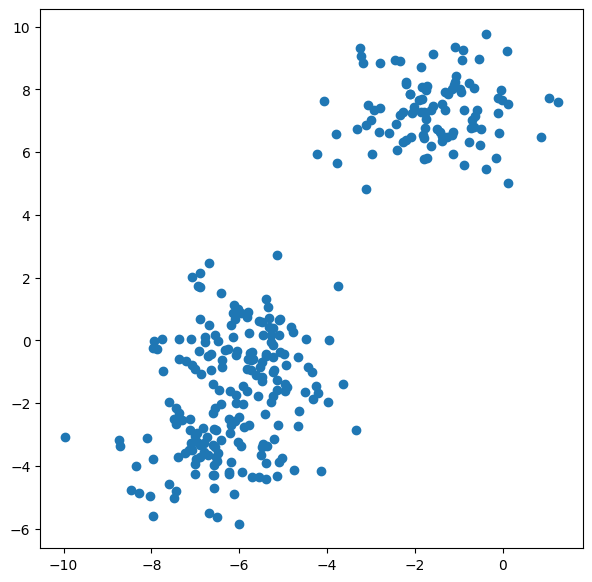

In [59]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

### K-Means++

In [81]:
from scipy.spatial.distance import cdist

In [ ]:
# 'n_clusters': np.arange(1, 6, 1)

In [97]:
from sklearn.cluster import KMeans as KMeans

k_means_optimal = GridSearchCV(KMeans(), 
                                             {'n_clusters': np.arange(2, 3, 1),
                                              'init': ["k-means++", "random"],
                                              'n_init' : np.arange(1, 11, 1),
                                              'max_iter' : np.arange(1, 10, 1)
                                              },
                                              ).fit(X)

In [98]:
k_means_optimal.best_estimator_

KMeans(init='random', max_iter=2, n_clusters=2, n_init=8)

In [108]:
K = range(1, 10)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for k in K:
    model = KMeans(n_clusters=k,
                      init='k-means++',
                      n_init=8,
                      max_iter=10,
                      random_state=0)

    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = model.inertia_

print("DISTORTION")
for key, val in mapping1.items():
    print(f'{key} : {val}')
print("ITERIA")
for key, val in mapping2.items():
    print(f'{key} : {val}')

DISTORTION
1 : 4.70326964394971
2 : 1.754587698537401
3 : 1.2595993529223457
4 : 1.1447602176196516
5 : 1.065360928380417
6 : 0.998906151158972
7 : 0.9494728903703431
8 : 0.8734149505577752
9 : 0.8305816802430205
ITERIA
1 : 8033.825126442547
2 : 1167.1232121408843
3 : 615.6709124444712
4 : 516.119354586298
5 : 439.6690243321047
6 : 386.95984759581586
7 : 340.18016766496356
8 : 302.43337723476066
9 : 262.1118821035031


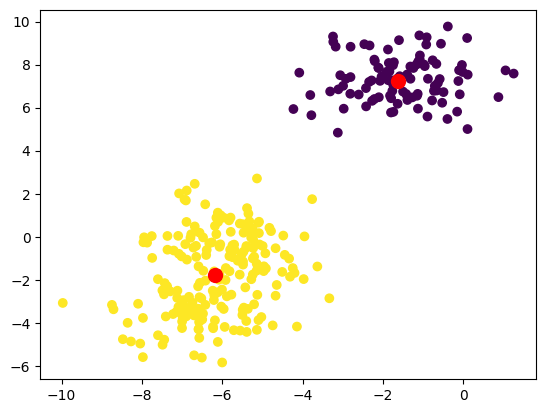

In [99]:
plt.scatter(X[:,0], X[:,1], c=k_means_optimal.best_estimator_.labels_)
plt.scatter(k_means_optimal.best_estimator_.cluster_centers_[:,0], k_means_optimal.best_estimator_.cluster_centers_[:,1], s=100, c='red')

In [103]:
from sklearn.metrics.cluster import rand_score

rand_score(k_means_optimal.best_estimator_.labels_, y)

0.7770345596432553

In [104]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(k_means_optimal.best_estimator_.labels_, y)

0.5697841726618705

In [105]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means_optimal.best_estimator_.labels_)

0.7561919106274947

In [106]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, k_means_optimal.best_estimator_.labels_)

0.3246198035550335

### Affinity propagation

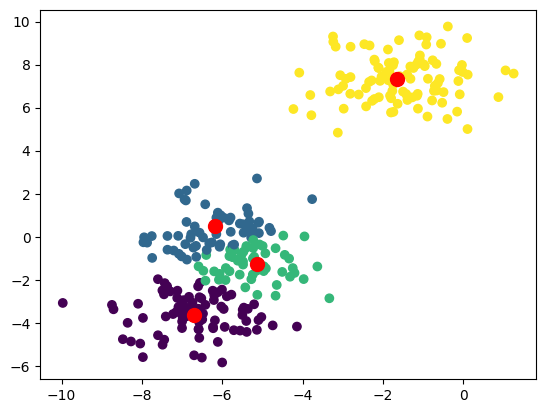

In [8]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-82).fit(X)

plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

### dbscan

[-1  0  1  2  3  4  5]


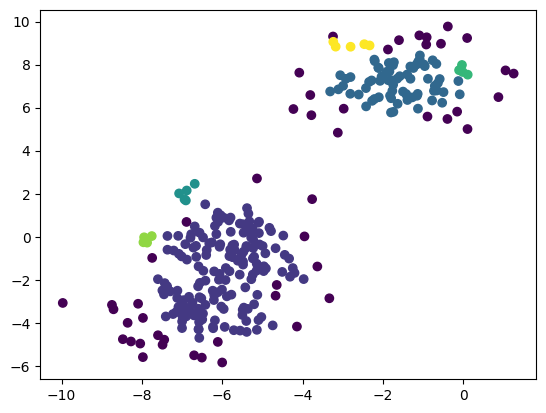

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(X)

print(np.unique(dbscan.labels_))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

### Gaussian Mixtures

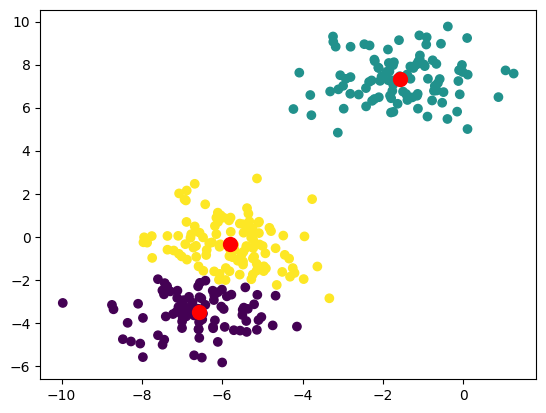

In [10]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(X)

gm.predict(X)

plt.scatter(X[:,0], X[:,1], c=gm.predict(X))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Иерархическая кластеризация

In [12]:
from scipy.cluster import hierarchy

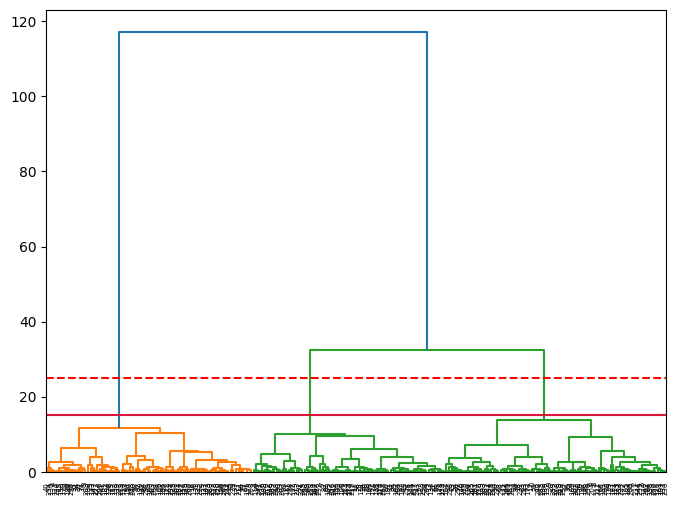

In [13]:
clusters = hierarchy.linkage(X, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson');

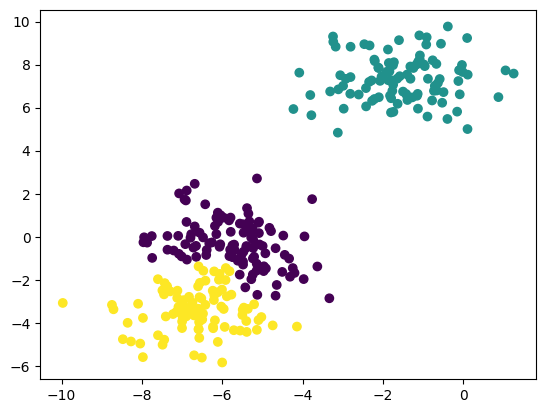

In [14]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)